#Trabalho GSI

Intuito do Trabalho: análise de arquivo csv para obtenção de insights sobre dados do airbnb no Rio de Janeiro

Questões abordadas:
- Quais Bairros possuem o maior número de acomodações anunciadas
- Qual é o Preço médio das diárias
- Como a Quantidade de avaliações se distribui entre os diferentes tipos de acomodações
- Qual a Maior e a Menor nota das avaliações?
- Como são distribuídos os meios de verificação de anfitriões

Questões Análisadas por mim:
- Top 5 Airbnb's mais bem avaliados
- Qual é o Bairro onde a média das diárias são as mais altas e o Bairro onde é a média das diárias são as mais baixas
- Qual é a média da nota geral e o preço médio das diárias para cada tipo de quarto (Casa/Apartamento Inteiro, Quarto Privado, etc.), e qual desses tipos oferece o melhor custo-benefício (considerando a maior nota em relação ao menor preço)?
- Quem Lidera a oferta do tipo de quarto mais avaliado

Ferramentas:
- Bibliotecas: Pandas, Seaborn, Matplotlib

# Contextualização dos Dados

Imagine que você é um turista e que seu sonho seja visitar o Rio de Janeiro, você escolhe a companhia, compra sua passagem, escolhe suas roupas, faz sua mala, e na hora de escolher o lugar para ficar durante sua viagem, você entra em dúvida sobre qual bairro, preço das diárias, qual a média das diárias para o tipo de quarto que você deseja, como são avaliadas cada tipo de acomodação e te deixando um pouco confuso em como escolher, qual escolher, onde escolher.

Esses problemas acabam prejudicando o processo de concluir esse sonho.
Este projeto visa auxiliar e promover análises relevantes para que um turista consiga se nortear dentro do airbnb do Rio de Janeiro.

# Importação dos Dados

In [1]:
#Importando Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criação do DataFrame do arquivo xslx
try:
  df_main = pd.read_excel('Rio de Janeiro.xlsx')
except Exception as e:
  print(f'Erro ao criar DataFrame: {e}')

# Conhecendo os Dados

In [3]:
# Conhecendo os dados
df_main.info()

'''
  Alguns Data Type's serão ajustados para facilitar a manipulação do Dataset.
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        3499 non-null   int64         
 1   url_do_anuncio                            3499 non-null   object        
 2   id_da_coleta                              3499 non-null   int64         
 3   data_da_ultima_coleta                     3499 non-null   datetime64[ns]
 4   fonte                                     3499 non-null   object        
 5   titulo_do_anuncio                         3499 non-null   object        
 6   descricao                                 3266 non-null   object        
 7   visao_geral_do_bairro                     2433 non-null   object        
 8   url_da_imagem                             3499 non-null   object        
 9   id_do_anfitriao               

"\n  Alguns Data Type's serão ajustados para facilitar a manipulação do Dataset.\n"

In [4]:
# Quantas linhas tem o dataset

df_main.shape[0]

3499

In [35]:
# Contagem de valores Nulos

round(df_main.isna().mean()*100,2)


,0
id,0.00
url_do_anuncio,0.00
id_da_coleta,0.00
data_da_ultima_coleta,0.00
fonte,0.00
...,...
total_calculado_de_anuncios_do_anfitriao,0.00
total_de_casas_apartamentos_inteiros,0.00
total_de_quartos_privados,0.00
total_de_quartos_compartilhados,0.00


In [6]:
# Formatando 'coluna' preco para float e removendo o simbolo '$'
try:
  df_main['preco'] = (
      df_main['preco']
      .replace('[$,]', '', regex=True)  # remove $ e vírgulas
      .astype(float)                      # converte para número
  )

except Exception as e:
  print(f'Erro ao formatar coluna preco; {e}')

df_main['preco'].dtypes


dtype('float64')

# Apresentação Incial Dos Dados

In [8]:
# Apresentação Inicial dos Dados Quantitativos relacionados a precificação das Diárias
df_main[[
    'preco',
    'numero_de_avaliacoes',
    'nota_geral',
    'quantidade_de_anuncios_do_anfitriao',
   ]].describe()

,preco,numero_de_avaliacoes,nota_geral,quantidade_de_anuncios_do_anfitriao
count,3132.000000,3499.000000,2994.000000,3498.000000
mean,858.471903,57.988282,347.430862,6.798170
std,2700.087171,88.903926,197.718636,18.272361
min,54.000000,0.000000,0.000000,1.000000
25%,230.000000,3.000000,50.000000,1.000000
50%,372.000000,20.000000,472.500000,2.000000
75%,700.000000,73.000000,486.000000,4.000000
max,76956.000000,744.000000,499.000000,251.000000


In [9]:
def visual1(df_main):
  try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 3))
    df_main.boxplot(
        column=['numero_de_avaliacoes', 'nota_geral', 'quantidade_de_anuncios_do_anfitriao'],
        vert=False,          # <- deixa horizontal
        patch_artist=True,   # preenche com cor
        grid=True
    )
    plt.title('Distribuição das Principais Variáveis Numéricas')
    plt.xlabel('Valores')
    plt.show()
  except Exception as e:
    print(f'Erro ao plotar gráfico: {e}')

def visual2(df_main):
  try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 2))
    df_main.boxplot(
      column=['preco'],
      vert=False,          # <- deixa horizontal
      patch_artist=True,   # preenche com cor
      grid=True
    )
    plt.title('Distribuição dos Preços das diárias')
    plt.xlabel('Valores')
    plt.show()
  except Exception as e:
    print(f'Erro ao plotar gráfico: {e}')


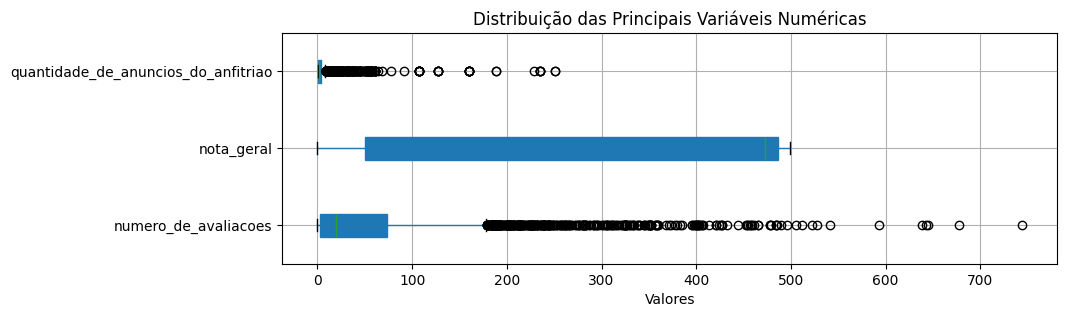

In [10]:
visual1(df_main)

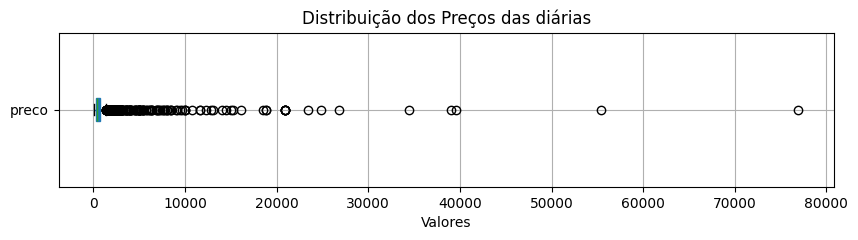

In [11]:
visual2(df_main)

# Limpeza de Dados

Antes de Iniciar as Análises e apresentação das questões, iremos limpar alguns dados, como linhas em brancos, outliers, trazendo o mais perto da realidade possível.

Colunas formatadas:
preco -> retirada do simbolo de '$' e converter para tipo float, para evitar problemas de análise. Além disso, retiramos valores que são considerados Outliers para aproximar os cálculos de preços médios da realidade de um turista


In [12]:
# Removendo linhas em branco da coluna de Preços e Outliers

# Criação de um Serie temporário para fazer o calculo do quartil
df_temp = df_main['preco'].dropna().copy()

# Cálculo do Quartil e Intervalo Interquartil com base nos dados do df_temp
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 0.5 * IQR
limite_superior = Q3 + 5.0 * IQR

# Filtrar o DataFrame original (df_main) usando os limites
df_main_clean = df_main[
    (df_main['preco'] >= limite_inferior) &
    (df_main['preco'] <= limite_superior)
].copy()

#Verificando valor máximo e mínimo do novo DF
print(df_main_clean['preco'].min())
print(df_main_clean['preco'].max())

#Limitando valor até 3050 para ainda considerar imóveis de luxo na escolha do turista


54.0
3050.0


In [13]:
def visual3(df_final_filtrado):
  try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 2))
    df_main_clean.boxplot(
      column=['preco'],
      vert=False,          # <- deixa horizontal
      patch_artist=True,   # preenche com cor
      grid=True
    )
    plt.title('Distribuição dos Preços das diárias')
    plt.xlabel('Valores')
    plt.show()
  except Exception as e:
    print(f'Erro ao plotar gráfico: {e}')


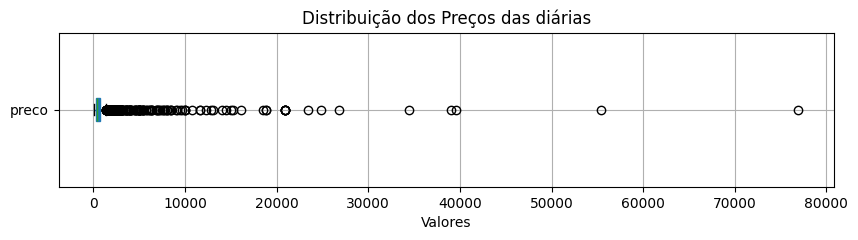

In [14]:
visual2(df_main)

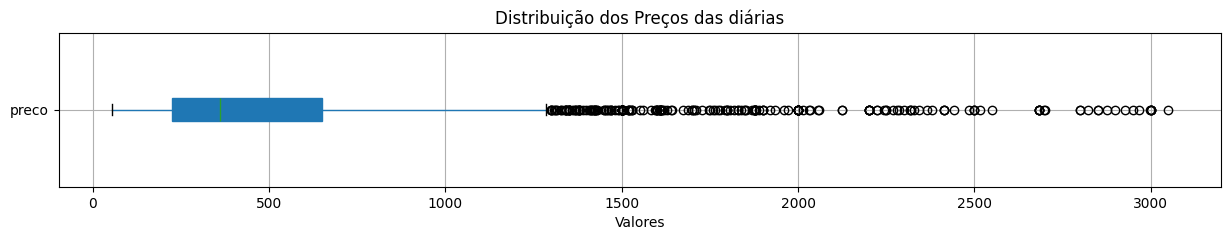

In [15]:
visual3(df_main_clean)
# A diferença entre os Dados da coluna Preco representados em um bloxplot, agora, é obtida uma análise mais real

# Questões

Questão 1: Quais Bairros possuem o maior número de acomodações anunciadas?

In [16]:
top_5_bairros = df_main_clean.groupby('bairro_padronizado')['acomodacoes'].sum().sort_values(ascending=False).head(5)
top_5_bairros

,acomodacoes
bairro_padronizado,
Copacabana,4139
Ipanema,1420
Barra da Tijuca,845
Leblon,695
Botafogo,589


Questão 2: Qual é o Preço médio das diárias

In [17]:
result = df_main_clean['preco'].mean()

print(f'A Média das diárias é de ${result:.2f}')

A Média das diárias é de $526.21


Questão 3: Como a Quantidade de avaliações se distribui entre os diferentes tipos de acomodações

In [18]:
top_5_quartos_avaliados = df_main_clean.groupby('tipo_de_quarto')['numero_de_avaliacoes'].sum().sort_values(ascending=False)
top_5_quartos_avaliados

,numero_de_avaliacoes
tipo_de_quarto,
Casa/apartamento inteiro,164978
Quarto privativo,24680
Quarto de hotel,217
Quarto compartilhado,81


Questão 4: Qual a Maior e a Menor nota das avaliações?

In [19]:
maior_nota = df_main_clean['nota_geral'].max()
print(f"A maior nota geral é: {maior_nota}")

menor_nota = df_main_clean['nota_geral'].min()
print(f"A menor nota geral é: {menor_nota}")

A maior nota geral é: 499.0
A menor nota geral é: 0.0


Questão 5: Como são distribuídos os meios de verificação de anfitriões

In [20]:
dist_verificacao = df_main_clean.groupby('verificacoes_do_anfitriao')['id_do_anfitriao'].count().sort_values(ascending=False)

dist_verificacao

,id_do_anfitriao
verificacoes_do_anfitriao,
"['email', 'telefone']",2539
['telefone'],242
"['email', 'telefone', 'email_profissional']",212
"['telefone', 'email_profissional']",13
['email'],8
"['email', 'email_profissional']",8
[],1
nenhum,1


# Questões Criadas

Questão 1: Airbnb's mais bem avaliados do RJ

In [21]:
df_avaliacoes = df_main_clean[['id', 'titulo_do_anuncio', 'nota_geral', 'numero_de_avaliacoes']].copy()

#Excluir Linhas onde nota_geral é nula
df_avaliacoes = df_avaliacoes.dropna(subset=['nota_geral'])
#Ordenando de forma correta os dados
top_airb_avaliado = df_avaliacoes.sort_values(['nota_geral', 'numero_de_avaliacoes'], ascending=False).head(5)
top_airb_avaliado

,id,titulo_do_anuncio,nota_geral,numero_de_avaliacoes
1214,2984779,Estúdio Copacabana Posto 6,499.0,222
3098,10183798,Fancy suite on the beach,499.0,174
2588,6792157,"Cobertura com estilo, conforto e privacidade",499.0,173
102,2278985,Complete Flat Front Barra da Tijuca Beach,499.0,163
1166,829709925665566592,Apartamento recém-reformado 150m praia Copacabana,499.0,126


Questão 2: Qual é o Bairro onde a média das diárias são as mais altas e o Bairro onde é a média das diárias são as mais baixas

In [22]:
media_por_bairro = df_main_clean.groupby('bairro_padronizado')['preco'].mean().reset_index().sort_values('preco', ascending=False)

# Encontra a posição (índice) do menor valor na coluna 'preco'
indice_do_menor = media_por_bairro['preco'].idxmin()
indice_do_maior = media_por_bairro['preco'].idxmax()
linha_do_menor = media_por_bairro.loc[indice_do_menor]
linha_do_maior = media_por_bairro.loc[indice_do_maior]

# Extrai o nome do bairro dessa linha
nome_do_bairro_menor = linha_do_menor['bairro_padronizado']
valor_da_media_menor = linha_do_menor['preco']
nome_do_bairro_maior = linha_do_maior['bairro_padronizado']
valor_da_media_maior = linha_do_maior['preco']

print(media_por_bairro)
print(f'O Bairro com a menor média de diárias é: {nome_do_bairro_menor}, com a média de ${valor_da_media_menor} e o Bairro com a maior média de diárias é: {nome_do_bairro_maior}, com a média de ${valor_da_media_maior} ')


   bairro_padronizado   preco
35       Higienópolis  1500.0
2                Anil  1495.0
69            Rocinha  1282.0
1             Andaraí  1259.0
3               Bangu  1230.5
..                ...     ...
57              Penha   100.0
72       Santo Cristo    95.0
84           Vaz Lobo    94.0
70         Santa Cruz    90.0
64  Quintino Bocaiúva    88.0

[89 rows x 2 columns]
O Bairro com a menor média de diárias é: Quintino Bocaiúva, com a média de $88.0 e o Bairro com a maior média de diárias é: Higienópolis, com a média de $1500.0 


Questão 3: Qual é a média da nota geral e o preço médio das diárias para cada tipo de quarto (Casa/Apartamento Inteiro, Quarto Privado, etc.), e qual desses tipos oferece o melhor custo-benefício (considerando a maior nota em relação ao menor preço)?

In [23]:
custo_beneficio = df_main_clean.groupby('tipo_de_quarto')[['nota_geral', 'preco']].mean().sort_values(['nota_geral','preco'], ascending=[False, True])
custo_beneficio

,nota_geral,preco
tipo_de_quarto,,
Casa/apartamento inteiro,368.356235,577.170142
Quarto privativo,302.050302,330.057283
Quarto de hotel,266.500000,1290.500000
Quarto compartilhado,245.538462,227.923077


Questão 4: Bairro que Lidera o n° de oferta de acomodações do tipo de quarto mais avaliado (casa/apartamento inteiro)

In [24]:
filtro_tipo_quarto = df_main_clean[df_main_clean['tipo_de_quarto']== 'Casa/apartamento inteiro']
top_quarto = filtro_tipo_quarto.groupby('bairro_padronizado')['acomodacoes'].sum().reset_index().sort_values('acomodacoes', ascending=False).head(5)
top_quarto

,bairro_padronizado,acomodacoes
16,Copacabana,3809
32,Ipanema,1344
4,Barra da Tijuca,781
41,Leblon,660
7,Botafogo,466


# Visualização dos Dados

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

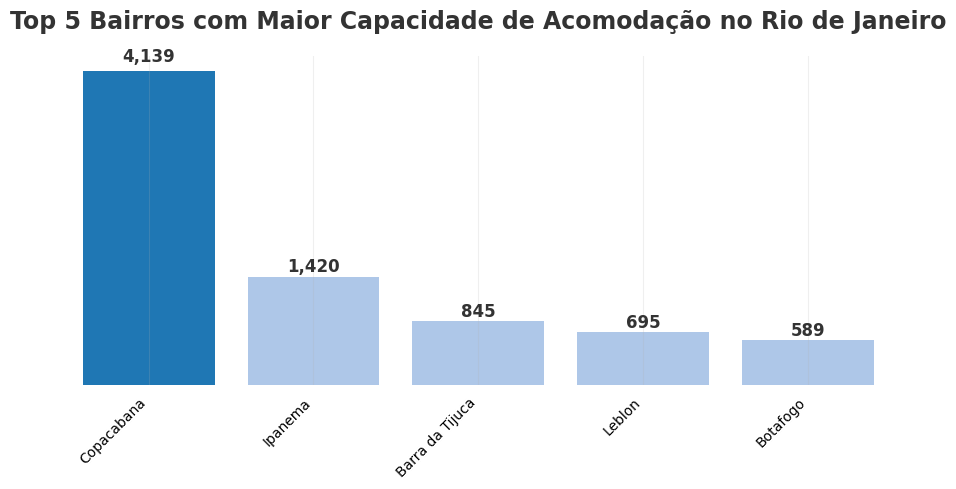

In [26]:
# Questão 1

cores = ['#1f77b4'] + ['#aec7e8'] * 4
plt.figure(figsize=(9,5))
barras = plt.bar(top_5_bairros.index, top_5_bairros.values, color=cores)
plt.xticks(rotation=45, ha='right')

plt.title('Top 5 Bairros com Maior Capacidade de Acomodação no Rio de Janeiro',
          fontsize=17,
          fontweight='bold', # Negrito no título
          color='#333333', # Cor do título
          pad=20
          )

for barra in barras:
    yval = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        yval + (yval * 0.02), # Posição Y ajustada para ficar um pouco acima da barra
        f'{int(yval):,}',
        ha='center',
        va='bottom', # Alinhamento vertical
        fontsize=12,
        color='#333333',
        fontweight='bold' # Negrito nos valores
    )
sns.despine(left=True, bottom=True) # Remove as linhas de cima e da direita
plt.tick_params(axis='y', left=False) # Remove os "ticks" do eixo Y, mas mantém os rótulos
plt.tick_params(axis='x', bottom=False) # Remove os "ticks" do eixo X
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.yticks([])
plt.tight_layout()
plt.show()

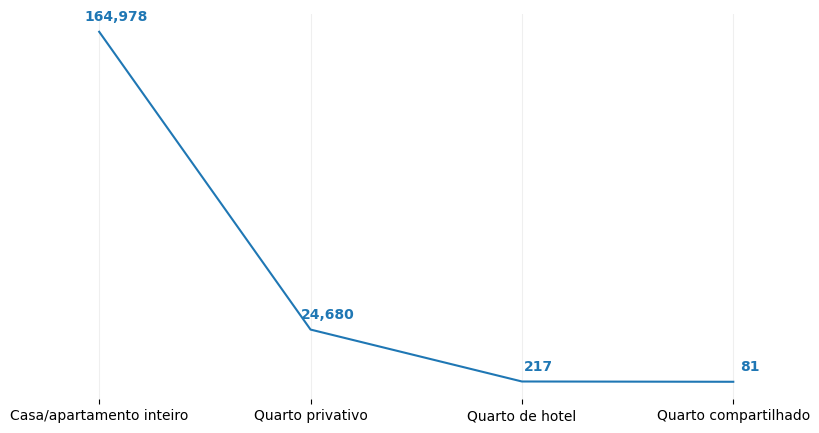

In [27]:
# Questão 3:
plt.figure(figsize=(9,5))
line = plt.plot(top_5_quartos_avaliados.index, top_5_quartos_avaliados.values, color='#1f77b4')
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.grid(axis='x', linestyle='-', alpha=0.2)
sns.despine(left=True, bottom=True)
plt.tick_params(axis='y', left=False)

x_coords = top_5_quartos_avaliados.index
y_values = top_5_quartos_avaliados.values

# deslocamento do rotulo de dados
y_margem = max(y_values) * 0.023
x_margem = 0.08

# Itera sobre os pontos para adicionar o rótulo
for i, (x, y) in enumerate(zip(x_coords, y_values)):
    x_deslocado = i + x_margem
    y_deslocado = y + y_margem

    plt.text(x_deslocado, y_deslocado, f'{y:,.0f}',
             ha='center',
             va='bottom',
             fontsize=10,
             color='#1f77b4',
             weight='bold'
             )
plt.yticks([])
plt.show()

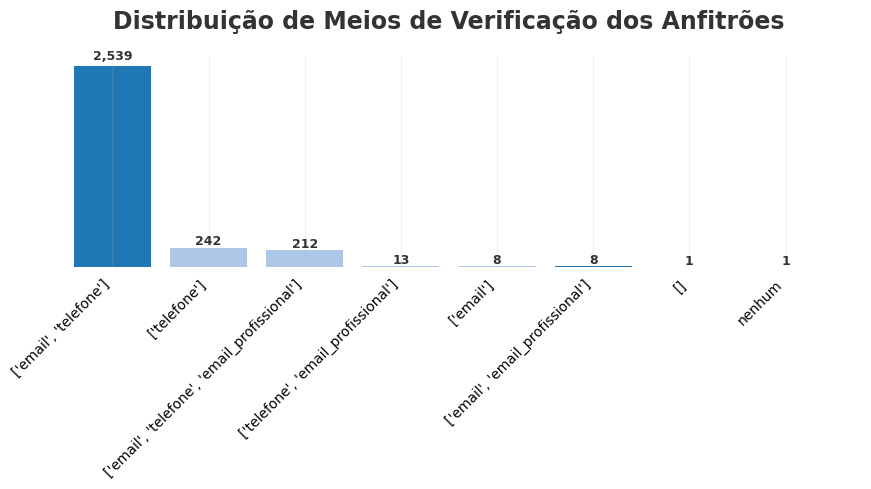

In [28]:
# Questão 4:

cores = ['#1f77b4'] + ['#aec7e8'] * 4
plt.figure(figsize=(9,5))
barras = plt.bar(dist_verificacao.index, dist_verificacao.values, color=cores)
plt.xticks(rotation=45, ha='right')

plt.title('Distribuição de Meios de Verificação dos Anfitrões',
          fontsize=17,
          fontweight='bold', # Negrito no título
          color='#333333', # Cor do título
          pad=20
          )

for barra in barras:
    yval = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        yval + (yval * 0.02), # Posição Y ajustada para ficar um pouco acima da barra
        f'{int(yval):,}',
        ha='center',
        va='bottom', # Alinhamento vertical
        fontsize=9,
        color='#333333',
        fontweight='bold' # Negrito nos valores
    )
sns.despine(left=True, bottom=True) # Remove as linhas de cima e da direita
plt.tick_params(axis='y', left=False) # Remove os "ticks" do eixo Y, mas mantém os rótulos
plt.tick_params(axis='x', bottom=False) # Remove os "ticks" do eixo X

plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.yticks([])
plt.show()

In [29]:
print(top_airb_avaliado['numero_de_avaliacoes'].max())

222


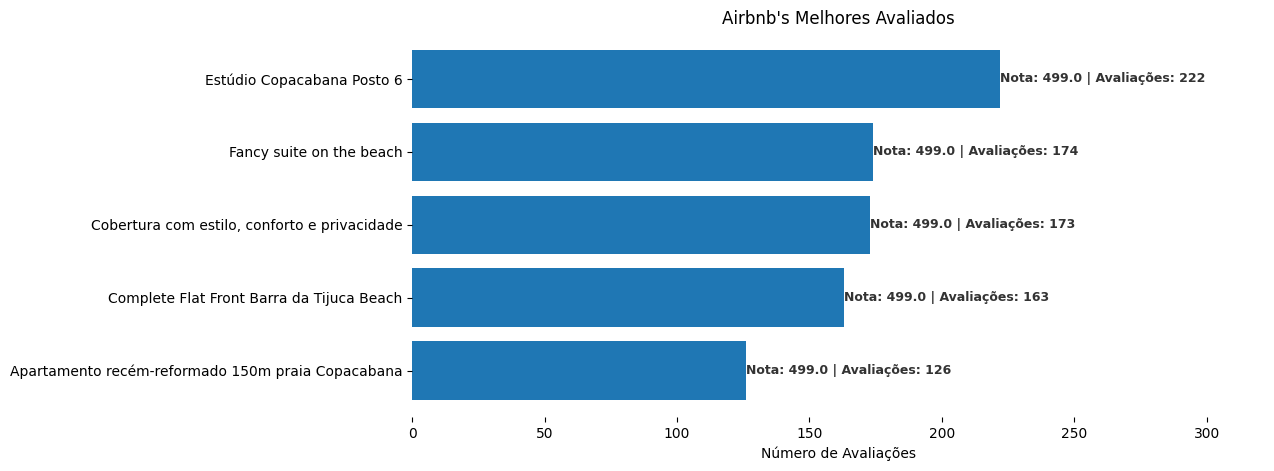

In [30]:
# Questão Criada 1:
plt.figure(figsize=(11,5))
barras = plt.barh(
    top_airb_avaliado['titulo_do_anuncio'],
    top_airb_avaliado['numero_de_avaliacoes'],
    color='#1f77b4' # Cor azul padrão
)
plt.title("Airbnb's Melhores Avaliados" )
plt.xlabel('Número de Avaliações')

# Adicionar Rótulos de Texto Indicando Nota geral e Numero de Avaliações para identificar melhores airbnb's
for barra, nota in zip(barras, top_airb_avaliado['nota_geral']):
  '''
  barra -> barra criada pelo plt.barh
  nota -> nota geral
  zip nos dois para garantir que para cada loop feito seja buscada 1 informação por vez
  '''
  #Pegar o Valor do eixo X para adicionar no rótulo, como esta na horizontal, o valor da barra é a própria width
  num_avaliacoes = barra.get_width()

  #configuração do rótulo de texto
  label =  f'Nota: {nota:.1f} | Avaliações: {int(num_avaliacoes)}'

  #plt.text -> usado para adicionar texto agregado no gráfico
  plt.text(
        num_avaliacoes + 0.01,  # Posição X (um pouco à frente da barra)
        barra.get_y() + barra.get_height()/2, # Posição Y (no centro da barra)
        label, # O rótulo duplo
        va='center', # Alinhamento vertical
        fontsize=9,
        fontweight='bold',
        color='#333333'
    )

#layout do gráfico]
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().invert_yaxis()
plt.xlim(right=top_airb_avaliado['numero_de_avaliacoes'].max() + 100)
plt.show()

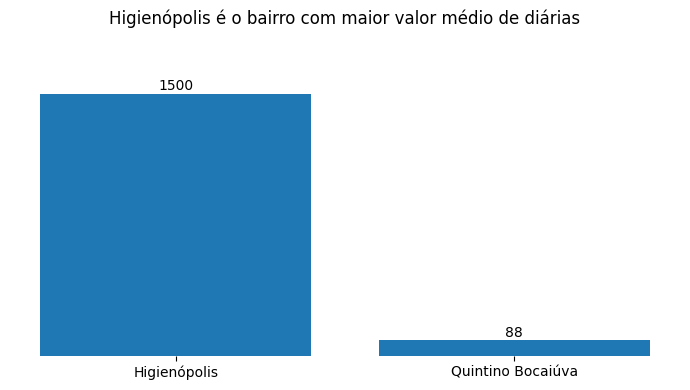

In [31]:
# Questão Criada 2:
nomes = [nome_do_bairro_maior, nome_do_bairro_menor]
valor = [valor_da_media_maior, valor_da_media_menor]

# Plotando o Gráfico
plt.figure(figsize=(7,4))
bar = plt.bar(nomes, valor , color='#1f77b4')
plt.ylim(top = valor_da_media_maior + 350)

# Adicionando Rótulo dos Dados
for barras in bar:
  yval = barras.get_height()
  plt.text(
      barras.get_x() + barras.get_width()/2,
      yval + 20,
      f'{yval:.0f}',
      ha='center'
  )

# Estilizando bordas e valores do gráfico
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])   # remove os números do eixo Y

plt.title('Higienópolis é o bairro com maior valor médio de diárias')
plt.tight_layout()
plt.show()

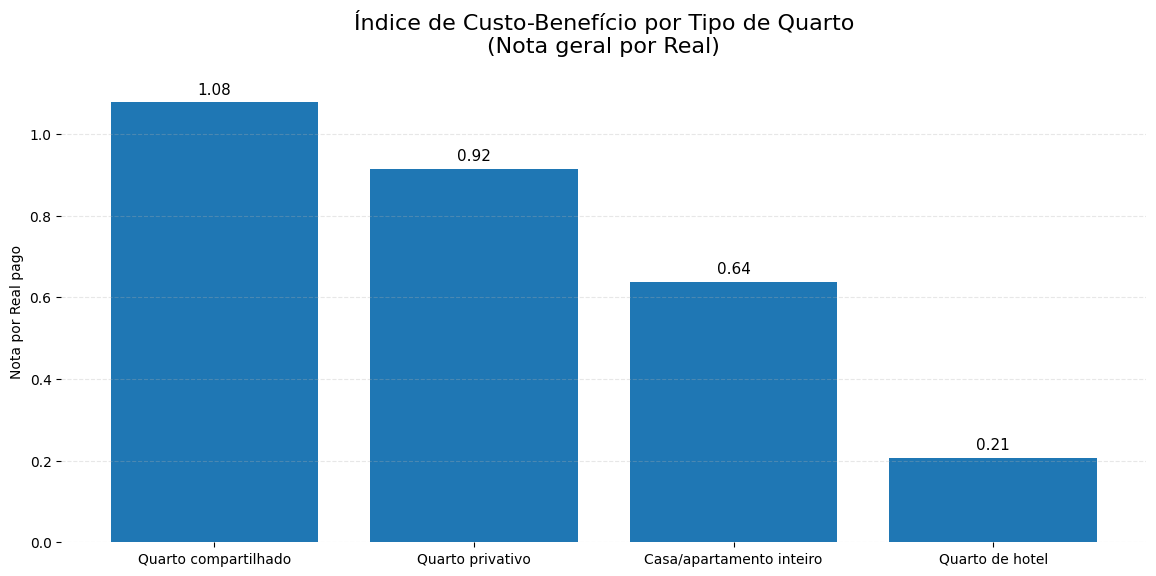

In [32]:
# Questão 3: será considerado no custo benefício a relação entre o retorno da experiência pelo valor pago na diária, um critério diferente de qualidade sem considerar preço

import matplotlib.pyplot as plt

# Cálculo do índice
df = custo_beneficio.copy()
df['indice_cb'] = df['nota_geral'] / df['preco'] # RELAÇÃO entre a Nota e o Preço pago, quanto mais próximo de 1, maior o custo benefício
df = df.sort_values('indice_cb', ascending=False)

plt.figure(figsize=(14,6))
bars = plt.bar(df.index, df['indice_cb'])

# Rótulos
for b in bars:
    y = b.get_height()
    plt.text(
        b.get_x() + b.get_width()/2,
        y + 0.02,
        f'{y:.2f}',
        ha='center',
        fontsize=11
    )

plt.title('Índice de Custo-Benefício por Tipo de Quarto\n(Nota geral por Real)', fontsize=16, pad=20)
plt.ylabel('Nota por Real pago')


# tirar spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()



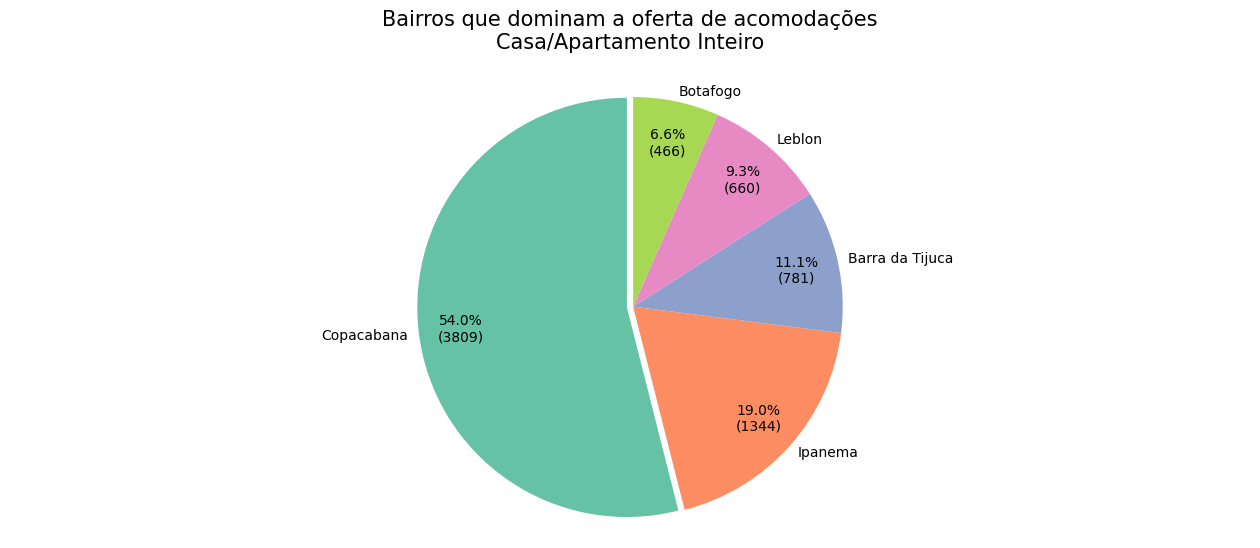

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta moderna
cores = sns.color_palette("Set2", len(top_quarto))

plt.figure(figsize=(16, 6))

# Explode leve para destacar a maior fatia
explode = [0.03 if v == top_quarto['acomodacoes'].max() else 0 for v in top_quarto['acomodacoes']]

def autopct_format(values):
    def new_format(acomodacao):
        total = sum(values)
        valor_absoluto = int(round(acomodacao * total / 100.0))
        return f"{acomodacao:.1f}%\n({valor_absoluto})"
    return new_format

pie_graph = plt.pie(
    top_quarto['acomodacoes'],
    labels=top_quarto['bairro_padronizado'],
    autopct= autopct_format(top_quarto['acomodacoes']),           # porcentagem e valor nas fatias
    pctdistance=0.8,             # traz o texto para dentro
    labeldistance=1.05,          # afasta os labels
    colors=cores,
    explode=explode,
    startangle=90                # começa de cima (mais bonito)
)

plt.title('Bairros que dominam a oferta de acomodações\nCasa/Apartamento Inteiro', pad=20, fontsize=15)

plt.axis('equal')  # deixa o gráfico perfeitamente redondo

plt.show()